In [19]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\Githubupload\churn_modelling.csv')
df.head(3)
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Following steps are involved in the model building

Initialising the ANN
Defining by adding layers
Compiling the ANN
Train the ANN

Units - number of columns of the dataset

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN
The ReLU function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. I

In [8]:
# Part 2 - Now let's make the ANN!

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()


# Adding the input layer and the first hidden layer
#classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)




Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.7124 - accuracy: 0.5753 - val_loss: 0.6205 - val_accuracy: 0.7584
Epoch 2/100
536/536 [==============================] - 0s 907us/step - loss: 0.5822 - accuracy: 0.7843 - val_loss: 0.5582 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 0s 893us/step - loss: 0.5415 - accuracy: 0.7962 - val_loss: 0.5338 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 0s 894us/step - loss: 0.5213 - accuracy: 0.7962 - val_loss: 0.5184 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 0s 874us/step - loss: 0.5071 - accuracy: 0.7962 - val_loss: 0.5066 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 0s 892us/step - loss: 0.4945 - accuracy: 0.7964 - val_loss: 0.4949 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 0s 887us/step - loss: 0.4824 - accuracy: 0.7994 - val_loss: 0.4835 - val_accu

536/536 [==============================] - 0s 856us/step - loss: 0.3937 - accuracy: 0.8371 - val_loss: 0.4145 - val_accuracy: 0.8213
Epoch 58/100
536/536 [==============================] - 0s 835us/step - loss: 0.3930 - accuracy: 0.8367 - val_loss: 0.4142 - val_accuracy: 0.8217
Epoch 59/100
536/536 [==============================] - 0s 830us/step - loss: 0.3925 - accuracy: 0.8377 - val_loss: 0.4137 - val_accuracy: 0.8224
Epoch 60/100
536/536 [==============================] - 0s 912us/step - loss: 0.3918 - accuracy: 0.8377 - val_loss: 0.4134 - val_accuracy: 0.8205
Epoch 61/100
536/536 [==============================] - 0s 770us/step - loss: 0.3912 - accuracy: 0.8388 - val_loss: 0.4128 - val_accuracy: 0.8209
Epoch 62/100
536/536 [==============================] - 0s 899us/step - loss: 0.3905 - accuracy: 0.8399 - val_loss: 0.4123 - val_accuracy: 0.8213
Epoch 63/100
536/536 [==============================] - 0s 808us/step - loss: 0.3899 - accuracy: 0.8380 - val_loss: 0.4116 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


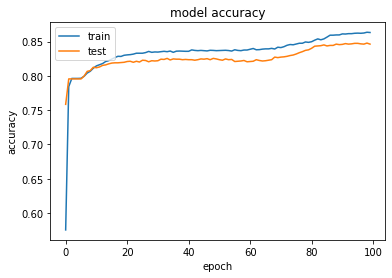

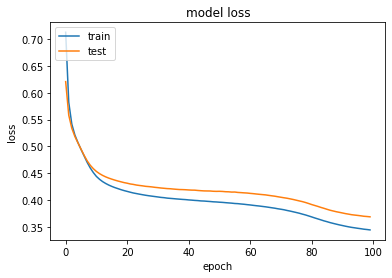

In [12]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("Accuracy score       :",score)

Accuracy score       : 0.8635


<AxesSubplot:>

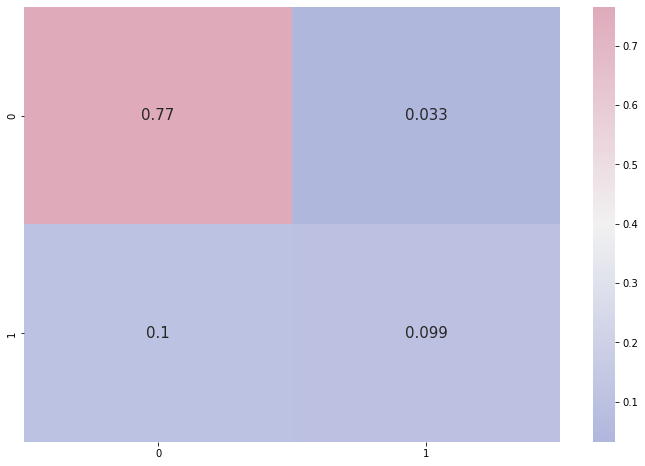

In [23]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

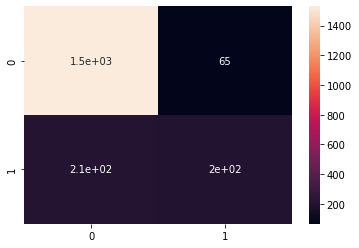

In [24]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')